# `Time Series Analysis` 
### Section 05: Autocorrelation and Partial Autocorrelation.

#### `- Importing Libraries.`

In [1]:
# استيراد المكتبات
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# تفضيلات نمط التصوير البياني
plt.style.use('ggplot')

#### `01-Correlation` 

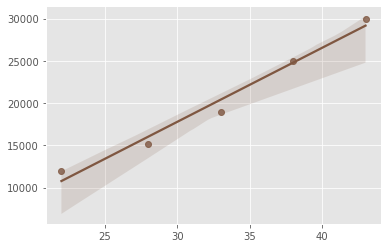

In [2]:
age = np.array([22, 28, 33, 38, 43])
salary = np.array([12000, 15200, 19000, 25000, 30000])    

sns.regplot(x=age, y=salary, color='#7F5741')
plt.show()

In [3]:
attributes_corr = np.corrcoef(age, salary)
pd.DataFrame(attributes_corr, columns={'age','salary'}, index={'age','salary'})

,salary,age
salary,1.000000,0.988386
age,0.988386,1.000000


#### `02- Shifted Time Series`

Revenues_00: [10000 12000 14000  8900  5000 10000 12000  7000  5900 15000 12000 13000]
Revenues_01: [12000 14000  8900  5000 10000 12000  7000  5900 15000 12000 13000]
Revenues_02: [14000  8900  5000 10000 12000  7000  5900 15000 12000 13000]


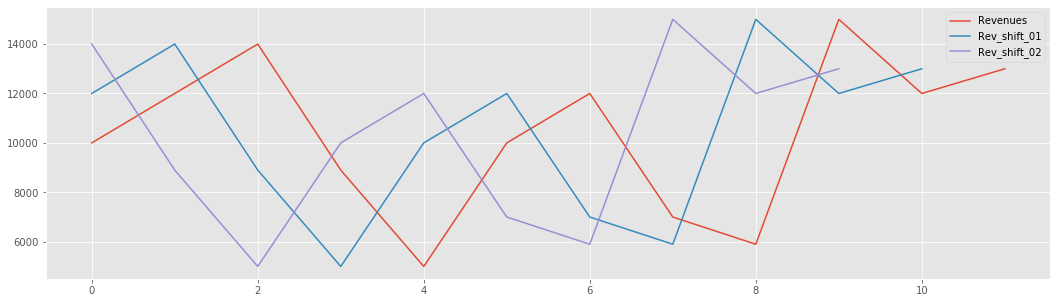

In [4]:
# إنشاء سلسلة زمنية و تأخيرها زمنياً 
Revenues = np.array([10000, 12000, 14000, 8900, 5000, 10000, 12000, 7000, 5900, 15000, 12000, 13000])
Revenues_shifted_1 = Revenues[1:]
Revenues_shifted_2 = Revenues[2:]
print(f"Revenues_00: {Revenues}\nRevenues_01: {Revenues_shifted_1}\nRevenues_02: {Revenues_shifted_2}")

# تصوير السلسلة ونظيراتها المتأخرة بيانيًا
fig, ax = plt.subplots(figsize=(18,5))
ax.plot(Revenues)
ax.plot(Revenues_shifted_1)
ax.plot(Revenues_shifted_2)
ax.legend(['Revenues', 'Rev_shift_01', 'Rev_shift_02'])
plt.show()

#### `03- Finding Autocorrelation Manually`

In [5]:
# إيجاد الارتباط بين السلسلة الأصلية ونظيراتها المتأخرة

lag_0 = np.corrcoef(Revenues, Revenues)[0,1]
lag_1 = np.corrcoef(Revenues[:-1], Revenues_shifted_1)[0,1]
lag_2 = np.corrcoef(Revenues[:-2], Revenues_shifted_2)[0,1]

print(f"Lag 0: {lag_0}\nlag 1: {lag_1}\nlag 2: {lag_2}")

Lag 0: 1.0
lag 1: 0.09342343040046394
lag 2: -0.4621229967699638


#### `04- Using Statsmodels library to find autocorrelation` 

In [6]:
from statsmodels.graphics.tsaplots import acf, plot_acf
ac_values = np.round(acf(Revenues, nlags=5,  fft=False),2)
ac_values

array([ 1.  ,  0.09, -0.43, -0.01,  0.25, -0.21])

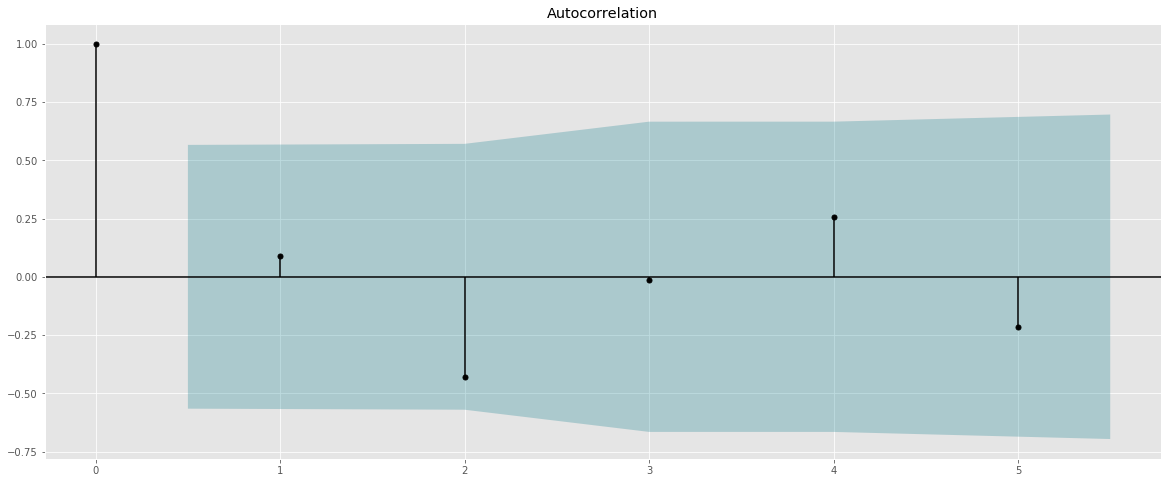

In [7]:
from matplotlib.collections import PolyCollection

fig, ax = plt.subplots(figsize=(20,8))
plot_acf(Revenues, ax=ax, lags=5, 
         color='#000000',  
         vlines_kwargs={"colors": '#000000'})

for item in ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor('#007687')

plt.show()

#### `05-Autocorrelation of actual time series`

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


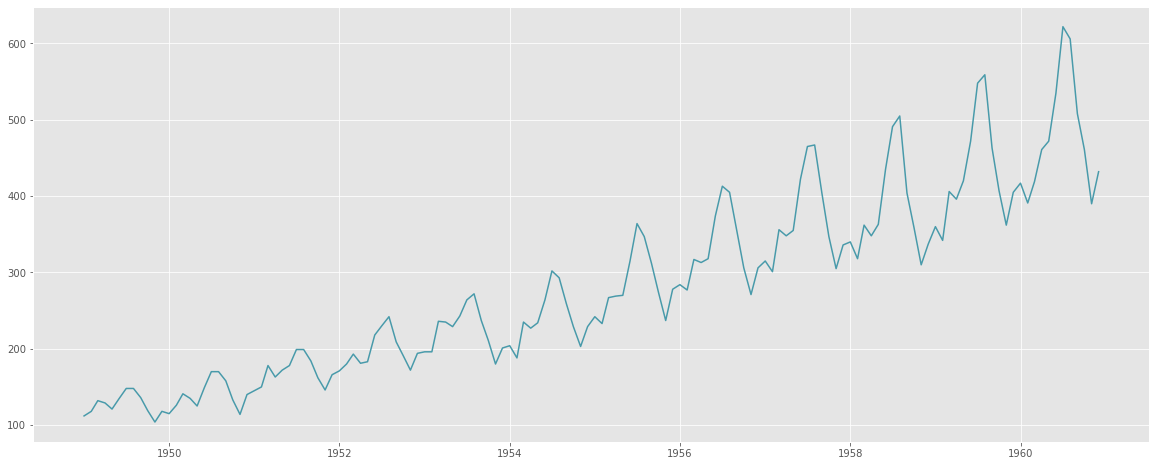

In [8]:
from IPython.display import display

# سلسلة زمنية تحتوي على أعداد المسافرين على أحد خطوط الطيران
airline_passengers = pd.read_csv('datasets/airline-passengers.csv', index_col='Month', parse_dates=True)
display(airline_passengers)

# التصوير البياني للسلسلة الزمنية
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(airline_passengers, c='#489AAA');

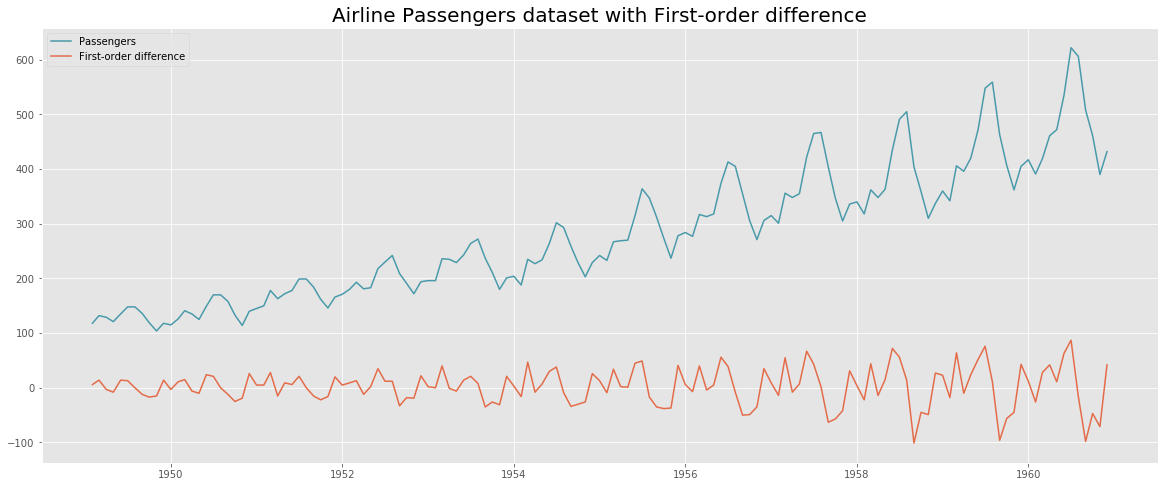

In [9]:
# إيجاد الفرق من الرتبة الأولى للسلسلة الزمنية
airline_passengers['Passengers_Diff'] = airline_passengers['Passengers'].diff(periods=1)
airline_passengers = airline_passengers.dropna()

# التصوير البياني للسلسة قبل وبعد إيجاد الفرق من الرتبة الأولى
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(airline_passengers['Passengers'], label='Passengers', c='#489AAA')
ax.plot(airline_passengers['Passengers_Diff'], label='First-order difference', color='#E46B48')
ax.legend()
plt.title('Airline Passengers dataset with First-order difference', size=20)
plt.show()

In [10]:
acf(airline_passengers['Passengers_Diff'], fft=False)

c:\Users\MOHAMAD\AppData\Local\Programs\Python\Python36\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,


array([ 1.        ,  0.30285526, -0.10214755, -0.24127349, -0.30040158,
       -0.09407271, -0.07844257, -0.0923622 , -0.29480158, -0.19177821,
       -0.10491707,  0.28293105,  0.82917786,  0.28450079, -0.10575172,
       -0.22213093, -0.23107603, -0.06227904, -0.06618505, -0.09039973,
       -0.29710958, -0.16273198, -0.08299369,  0.25551054,  0.70108554,
        0.25701406, -0.09817935, -0.1960499 , -0.1739647 , -0.06923038,
       -0.04168012, -0.07797386, -0.2467566 , -0.15699444, -0.04679059,
        0.19549893,  0.57957664,  0.23487539, -0.10594675, -0.13175469,
       -0.12212178])

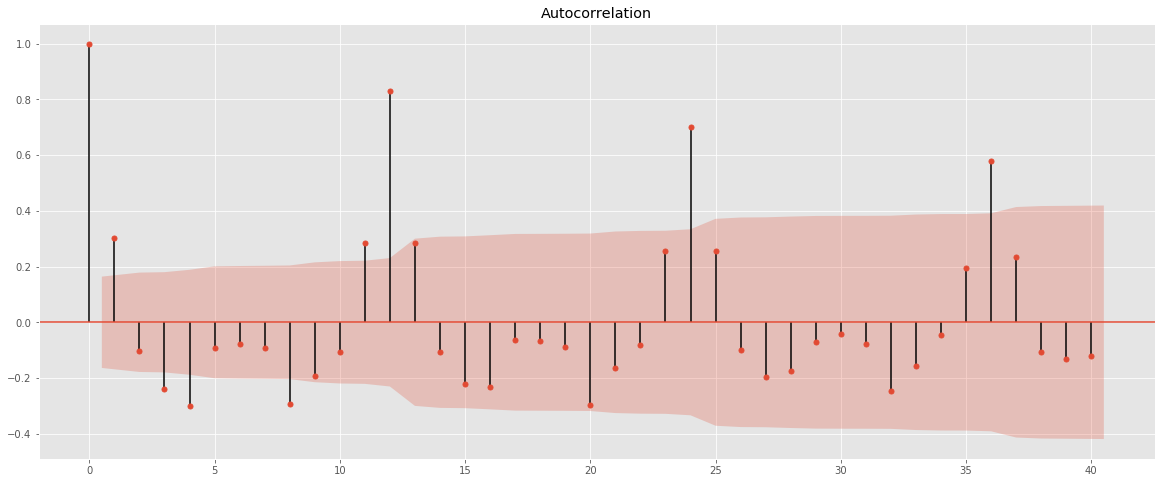

In [11]:
fig, ax = plt.subplots(figsize=(20,8))
plot_acf(airline_passengers['Passengers_Diff'], lags=40, ax=ax)
plt.show()

#### `06-Partial Autocorrelation`

In [31]:
from statsmodels.graphics.tsaplots import pacf, plot_pacf

pacf_values = pacf(airline_passengers['Passengers_Diff'], nlags=30)
np.round(pacf_values, 2)


array([ 1.  ,  0.3 , -0.22, -0.16, -0.23,  0.01, -0.2 , -0.16, -0.49,
       -0.28, -0.67, -0.42,  0.61, -0.05, -0.3 ,  0.02,  0.14,  0.09,
       -0.12,  0.01, -0.22, -0.12,  0.  , -0.07, -0.16, -0.17, -0.15,
       -0.02, -0.16, -0.48, -0.41])

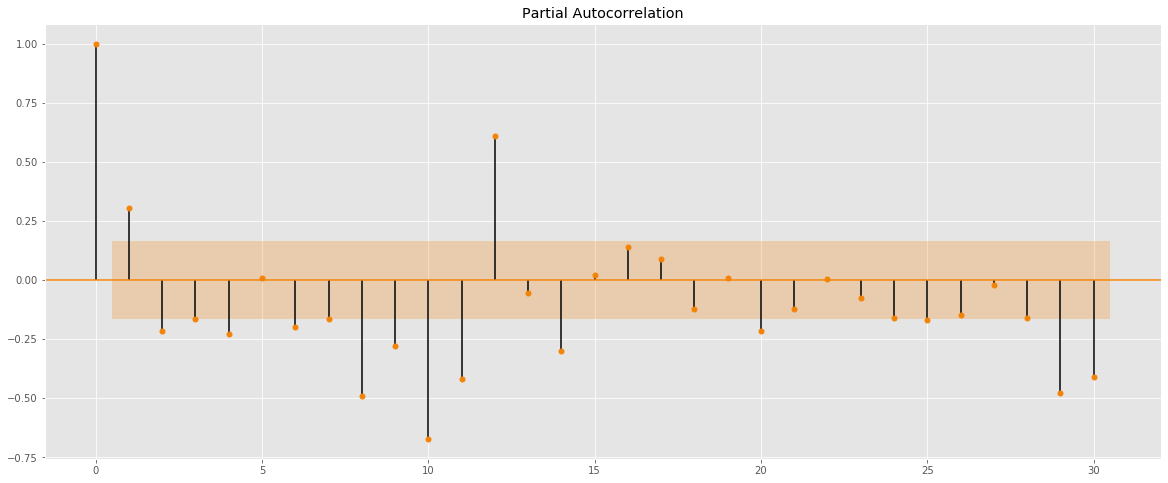

In [33]:
# Plot partial autocorrelation
fig, ax = plt.subplots(figsize=(20,8))

plot_pacf(airline_passengers['Passengers_Diff'], 
          lags=30, ax=ax, color='#F38307',  
          vlines_kwargs={"colors": '#000000'})

for item in ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor('#F38307')

plt.show()